Importing necessary Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

**reading the csv file**

In [ ]:
data = pd.read_csv('Movie_Review.csv')

** remove all rows with missing values**

In [ ]:
data.dropna(inplace=True)

**Converting into lower case and Removing Stopwords**

In [ ]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [ ]:
data['text'] = data['text'].apply(clean_review)

***visualize the most frequent word***

In [ ]:
from wordcloud import WordCloud

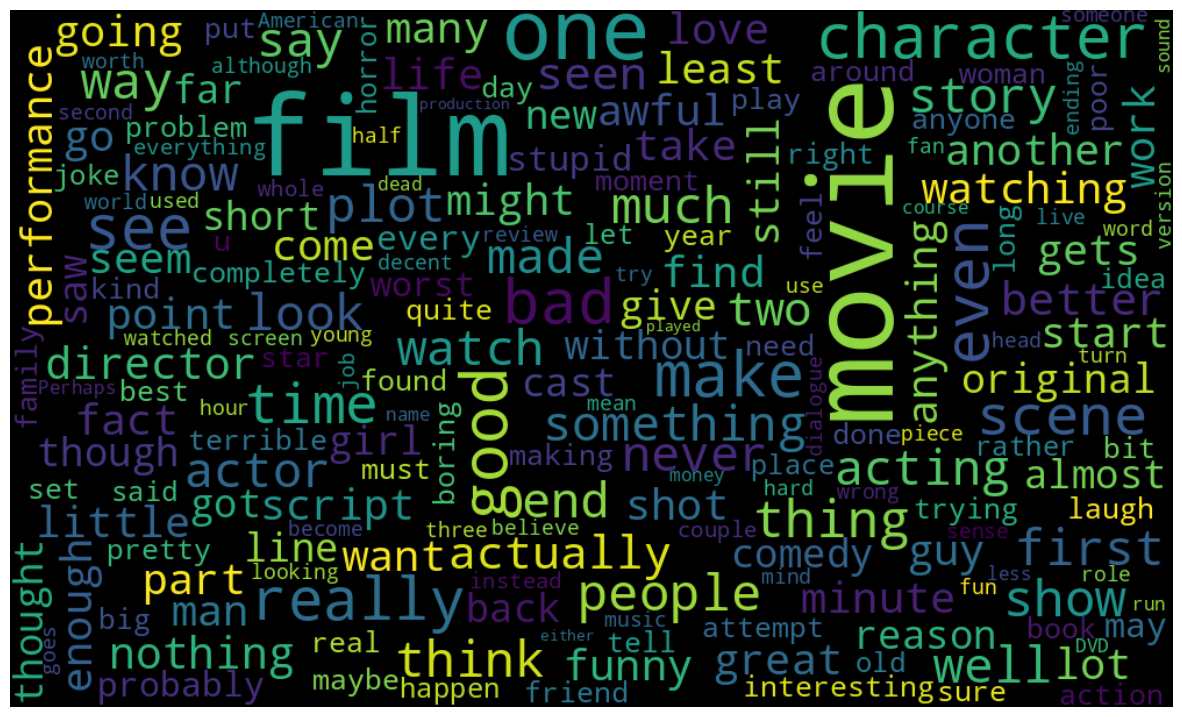

In [ ]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

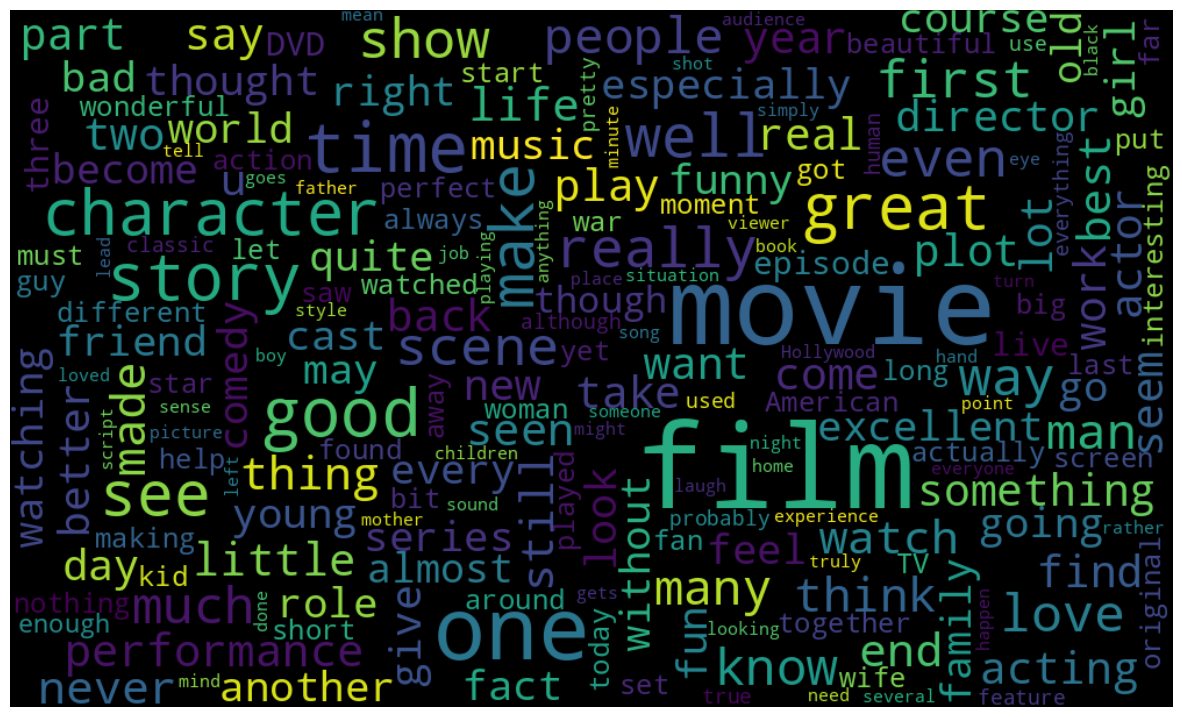

In [ ]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

**sentiment analysis preprocessing pipeline using TF-IDF vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

reviews = cv.fit_transform(data['text']).toarray()
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])
data['sentiment'].value_counts()

<ipython-input-13-686312536ecb>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


sentiment
0    500
1    500
Name: count, dtype: int64

***Applying the logistic regression model and creationg the confusion matrix***

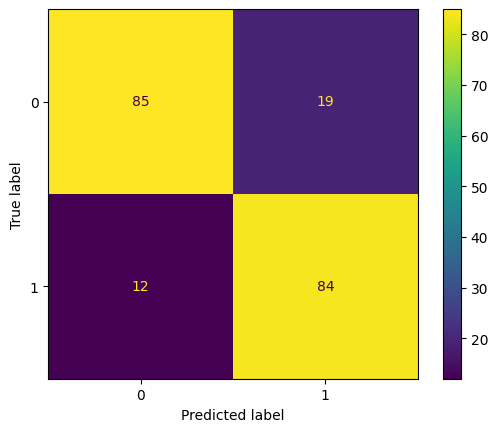

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)
model = LogisticRegression()
model.fit(reviews_train,sent_train)
predict = model.predict(reviews_test)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

**Pickeling to deploye the model**

In [ ]:
import pickle as pk

pk.dump(model,open('model.pkl','wb'))
pk.dump(cv,open('scaler.pkl','wb'))

***Result***

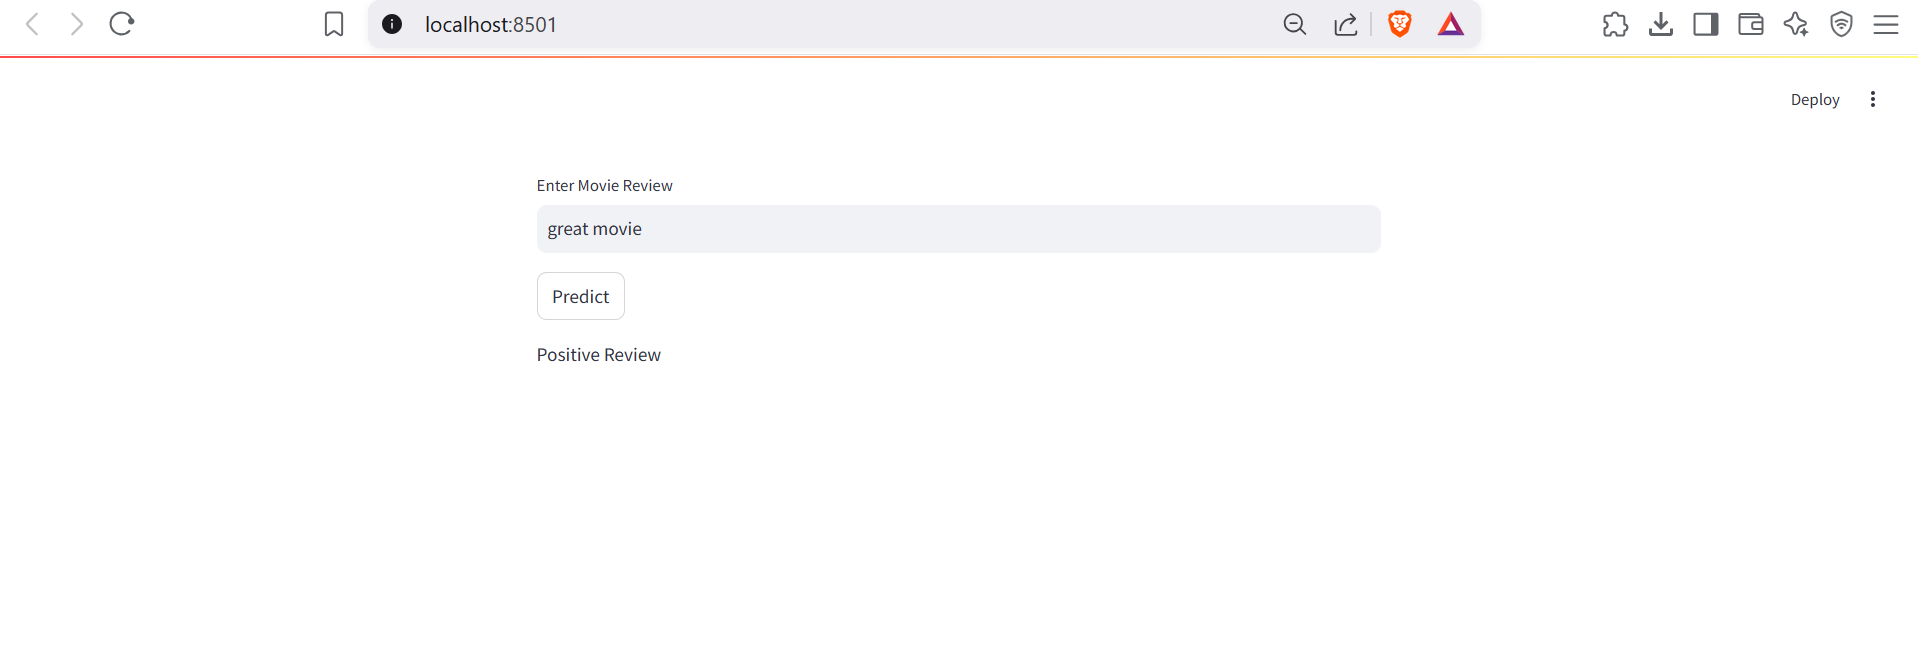